In [2]:
import tensorflow as tf
import os
import matplotlib.pyplot as plt

dataset_path=r'C:\Users\pachu\OneDrive\Desktop\Mini Project\Dataset\LungcancerDataSet\Data\train'

['adenocarcinoma', 'benigncases', 'largecellcarcinoma', 'malignantcases', 'normal', 'squamouscellcarcinoma']
Found 2029 files belonging to 6 classes.


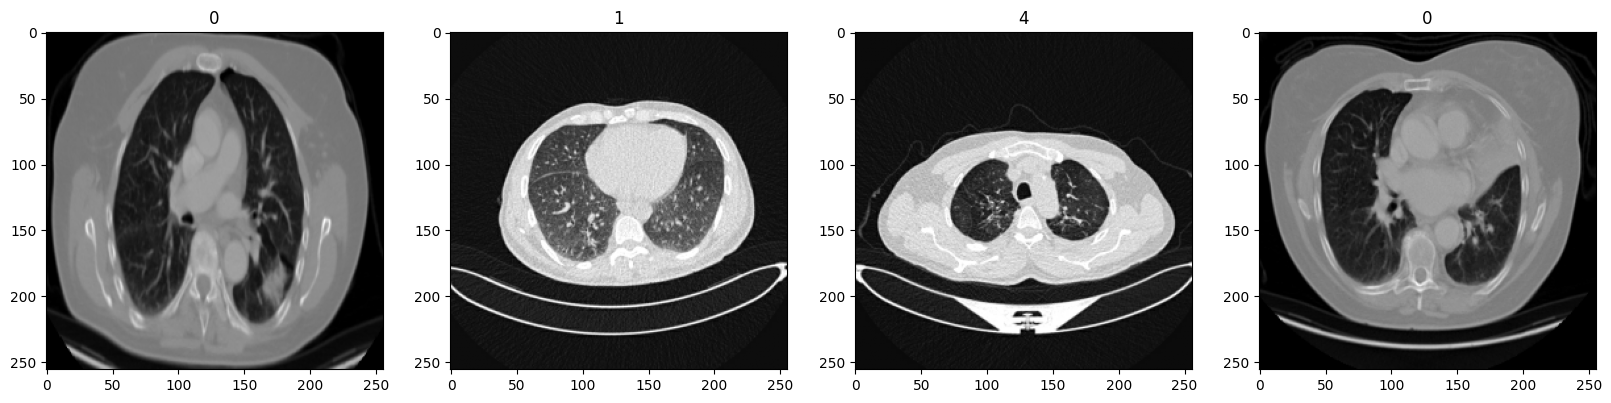

In [3]:
print(os.listdir(dataset_path))
data=tf.keras.utils.image_dataset_from_directory(dataset_path,color_mode='grayscale',image_size=(256,256),batch_size=32,shuffle=True)
data_iterator=data.as_numpy_iterator()
class_names=data.class_names
batch = data_iterator.next()
fig, ax= plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
    ax[idx].imshow(img,cmap=plt.cm.gray)
    ax[idx].title.set_text(batch[1][idx])


In [4]:
data=data.map(lambda x,y: (x/255, y),num_parallel_calls=tf.data.AUTOTUNE) #normalization
scaled_iterator=data.as_numpy_iterator()
batch=scaled_iterator.next()

In [5]:
train_size=int(len(data)*0.7)
val_size=int(len(data)*0.2)+1
test_size=int(len(data)*0.1)

In [6]:
train=data.take(train_size)
val=data.skip(train_size).take(val_size)
test=data.skip(train_size + val_size).take(test_size)

In [7]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, AveragePooling2D, Dense, Flatten
from tensorflow.keras import regularizers

# Define the model
model = Sequential()

# 1. Conv Layer (7x7, 64 filters, stride 2, padding 3)
model.add(Conv2D(64, (7, 7), strides=2, padding="same", activation="relu", input_shape=(256, 256, 1)))

# 2. Max Pooling Layer (3x3, stride 2, padding 1)
model.add(MaxPool2D(pool_size=(3, 3), strides=2, padding="same"))

# 3. Conv Layer (1x1, 64 filters, stride 1, padding 0)
model.add(Conv2D(64, (1, 1), strides=1, padding="valid", activation="relu"))

# 4. Conv Layer (3x3, 64 filters, stride 1, padding 1)
model.add(Conv2D(64, (3, 3), strides=1, padding="same", activation="relu"))

# 5. Conv Layer (1x1, 256 filters, stride 1, padding 0)
model.add(Conv2D(256, (1, 1), strides=1, padding="valid", activation="relu"))

# 6. Conv Layer (1x1, 128 filters, stride 2, padding 0)
model.add(Conv2D(128, (1, 1), strides=2, padding="valid", activation="relu"))

# 7. Conv Layer (3x3, 128 filters, stride 1, padding 1)
model.add(Conv2D(128, (3, 3), strides=1, padding="same", activation="relu"))

# 8. Conv Layer (1x1, 512 filters, stride 1, padding 0)
model.add(Conv2D(512, (1, 1), strides=1, padding="valid", activation="relu"))

# 9. Conv Layer (1x1, 256 filters, stride 2, padding 0)
model.add(Conv2D(256, (1, 1), strides=2, padding="valid", activation="relu"))

# 10. Conv Layer (3x3, 256 filters, stride 1, padding 1)
model.add(Conv2D(256, (3, 3), strides=1, padding="same", activation="relu"))

# 11. Conv Layer (1x1, 1024 filters, stride 1, padding 0)
model.add(Conv2D(1024, (1, 1), strides=1, padding="valid", activation="relu"))

# 12. Average Pooling Layer
model.add(AveragePooling2D(pool_size=(2, 2)))

# 13. Flatten Layer
model.add(Flatten())

# 14. Fully Connected Layer (1000 units)
model.add(Dense(1000, activation="softmax"))

# Compile the model
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# Model Summary
model.summary()


c:\Users\pachu\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 64)   │         3,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 64)     │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 64, 64, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 64, 64, 256)    │        16,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 32, 32, 128)    │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 32, 32, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 32, 32, 512)    │        66,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 16, 16, 256)    │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 16, 16, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 16, 16, 1024)   │       263,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d               │ (None, 8, 8, 1024)     │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 65536)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1000)           │    65,537,000 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 66,829,032 (254.93 MB)

 Trainable params: 66,829,032 (254.93 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Define paths and callbacks
call_back_dir = r'C:\Users\pachu\OneDrive\Desktop\Mini Project\model1.keras.weights.h5'

# Model Checkpoint callback to save weights
Checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=call_back_dir, save_weights_only=True)

# Early Stopping callback to stop training when validation loss doesn't improve
early_stop = EarlyStopping(monitor="val_loss", patience=3, restore_best_weights=True)


In [9]:
hist=model.fit(train, epochs=20, validation_data=val,callbacks=[Checkpoint_callback,early_stop])

Epoch 1/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 35s 741ms/step - accuracy: 0.2156 - loss: 3.2034 - val_accuracy: 0.2885 - val_loss: 1.5136
Epoch 2/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 33s 744ms/step - accuracy: 0.3789 - loss: 1.3755 - val_accuracy: 0.6082 - val_loss: 1.0407
Epoch 3/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 32s 721ms/step - accuracy: 0.4985 - loss: 1.0762 - val_accuracy: 0.5481 - val_loss: 1.0122
Epoch 4/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 33s 755ms/step - accuracy: 0.5571 - loss: 0.9737 - val_accuracy: 0.6394 - val_loss: 0.8679
Epoch 5/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 34s 765ms/step - accuracy: 0.6498 - loss: 0.7902 - val_accuracy: 0.6731 - val_loss: 0.7867
Epoch 6/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 33s 743ms/step - accuracy: 0.7145 - loss: 0.6803 - val_accuracy: 0.6370 - val_loss: 0.8523
Epoch 7/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 33s 751ms/step - accuracy: 0.7180 - loss: 0.6994 - val_accuracy: 0.7933 - val_loss: 0.5130
Epoch 8/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 32s 720ms/step - accuracy: 0.8067 - loss: 0.4612 - val_accu

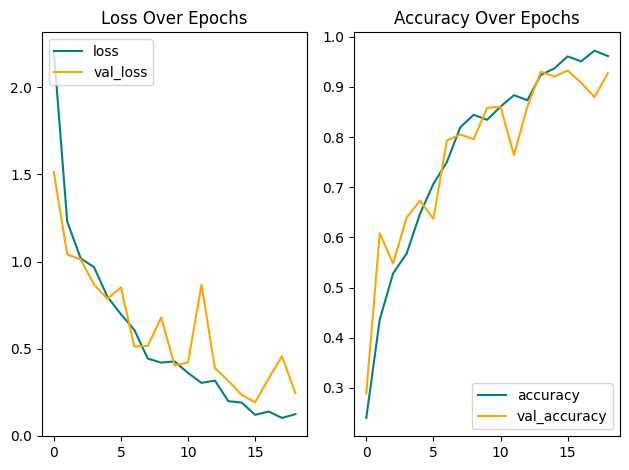

In [10]:
fig,ax=plt.subplots(1,2,)
ax[0].plot(hist.history['loss'],color='Teal',label="loss")
ax[0].plot(hist.history['val_loss'],color='orange',label='val_loss')
ax[0].set_title("Loss Over Epochs")
ax[0].legend(loc='upper left')

ax[1].plot(hist.history['accuracy'],color='Teal',label="accuracy")
ax[1].plot(hist.history['val_accuracy'],color='orange',label='val_accuracy')
ax[1].set_title("Accuracy Over Epochs")
ax[1].legend(loc="lower right")
plt.tight_layout()
plt.show()

In [11]:
ypredapp=[]
yorg=[]
for batch in train.as_numpy_iterator():
    x,y = batch
    ypred=model.predict(x)
    ypredapp.append(ypred.argmax(axis=1))
    yorg.append(y)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

In [12]:
import numpy as np
ypredapp = np.concatenate(ypredapp)
yorg = np.concatenate(yorg)

from sklearn.metrics import classification_report
print(classification_report(yorg, ypredapp))

              precision    recall  f1-score   support

           0       0.94      0.95      0.94       235
           1       1.00      0.99      0.99        72
           2       0.98      0.90      0.94       135
           3       0.99      1.00      1.00       391
           4       1.00      0.98      0.99       399
           5       0.89      0.96      0.93       176

    accuracy                           0.97      1408
   macro avg       0.97      0.96      0.97      1408
weighted avg       0.97      0.97      0.97      1408



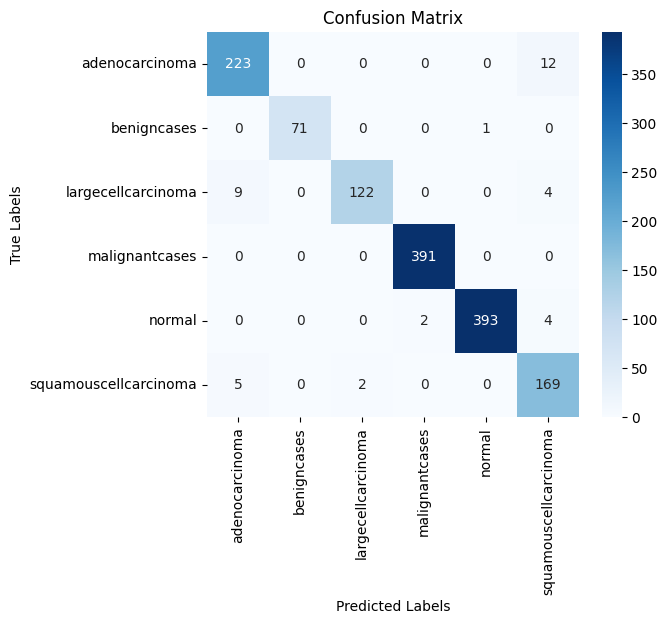

In [13]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(yorg, ypredapp)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [14]:
save_dir=r'C:\Users\pachu\OneDrive\Desktop\Mini Project\model'
os.makedirs(save_dir, exist_ok=True)
model.save(os.path.join(save_dir,'exp1.keras'))